In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy
import argparse
from RKadaptivemultieq import *
from diffeqs import *
from diffeqs_forscipy import *
from plottingfns import * #still have to update animate to handle varying size time steps
from getICs import *
from errorfunctions import *
import sys
import os
sys.path.append(os.path.join('..', 'importantfunctions'))
from ODEsolvers import *

In [26]:
def ploths(Ts,Rs,Hs,colors,filename=None):
    #colors should be something like colors=["deeppink","green","blue"]

    numobjects=Rs.shape[1]//4 #because four fields per object and want it to be an int

    #create lists of arrays for coordinates
    Xs=[]
    Ys=[]
    for i in range(numobjects):
        Xs.append(Rs[:,4*i])
        Ys.append(Rs[:,4*i+1])

    fig,axs=plt.subplots(2,1)

    axs[0].set_xlabel('X coordinate')
    axs[0].set_ylabel('Y coordinate')
    axs[0].set_title(f'Paths of the {numobjects} Objects')

    #set the limits of the plot to be the range of the points with a buffer zone
    allX=np.concatenate(Xs)
    allY=np.concatenate(Ys)
    Xmax=allX.max()
    Xmin=allX.min()
    Ymax=allY.max()
    Ymin=allY.min()
    width=Xmax-Xmin
    height=Ymax-Ymin
    axs[0].set_xlim(Xmin-0.1*width,Xmax+0.1*width)
    axs[0].set_ylim(Ymin-0.1*height,Ymax+0.1*height)

    line_step=1
    if len(Ts)>10000:
        line_step=len(Ts)//10000 #only do this many points

    for i in range(numobjects):
        line_color = colors[i]
        axs[0].plot(Xs[i][::line_step], Ys[i][::line_step], color=line_color)

    axs[1].plot(Ts,np.log10(Hs),color='black')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('log10(h)')

    plt.tight_layout()
    
    if filename is not None:
        fig.savefig(f'{filename}.png')
    return fig

In [14]:
R0=getICs('oneorbit','recommended')
t_span=(0,10)
Ts,Rs,Hs=RK4adapt(oneorbit,errf_onebody,R0,t_span,hstart=1e-6,tol=1e-12)

In [15]:
len(Ts)

7730

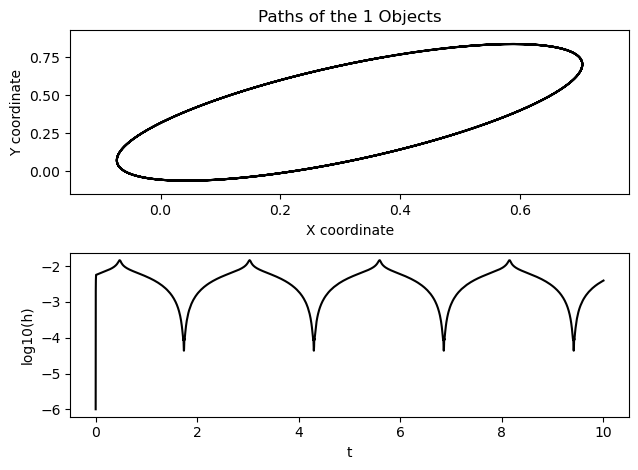

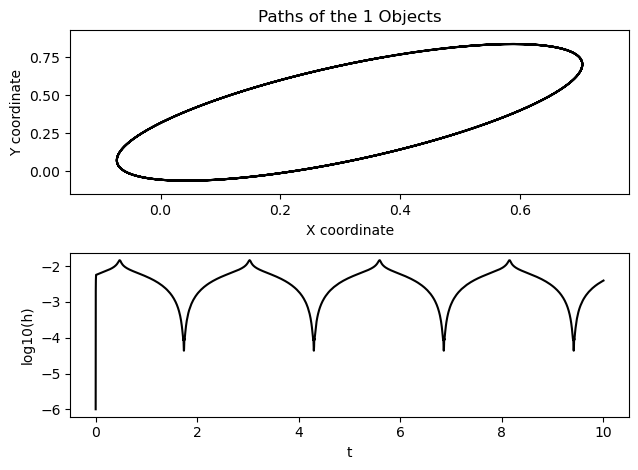

In [28]:
colors=getcolors('oneorbit','plot')
ploths(Ts,Rs,Hs,colors)

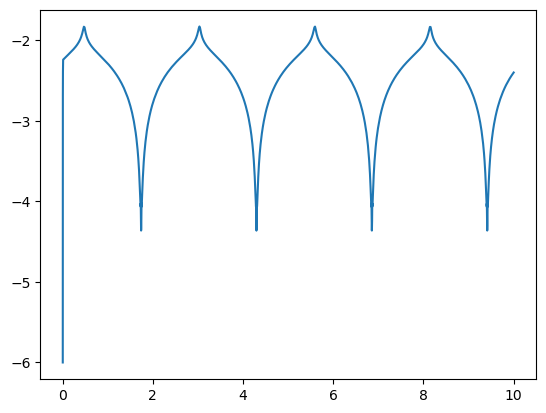

In [20]:
plt.plot(Ts,np.log10(Hs))